In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error ,accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier



In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
df.rename(columns={'Genre':'Gender'},inplace=True)

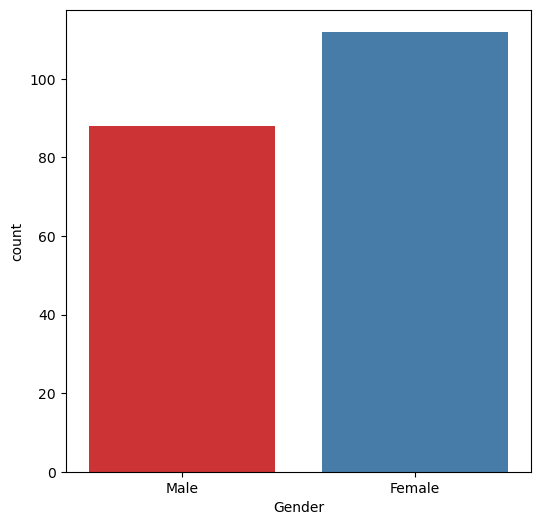

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',data=df, palette='Set1')
plt.show()

C:\Users\Zaghloula\AppData\Local\Temp\ipykernel_7036\620372150.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"],color='r')


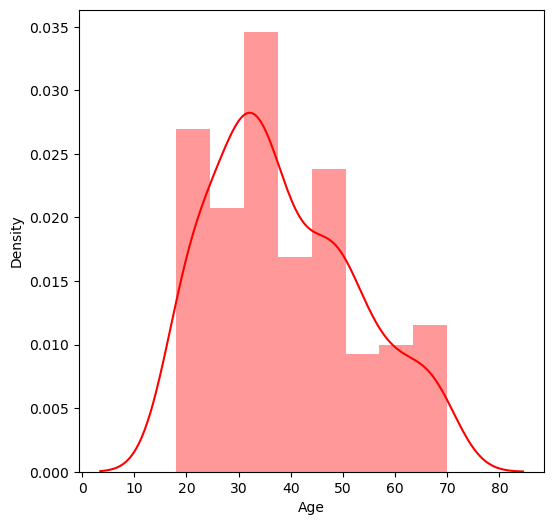

In [9]:
plt.figure(figsize=(6,6))
sns.distplot(df["Age"],color='r')
plt.xlabel("Age")
plt.show()

C:\Users\Zaghloula\AppData\Local\Temp\ipykernel_7036\1836042269.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


<Axes: >

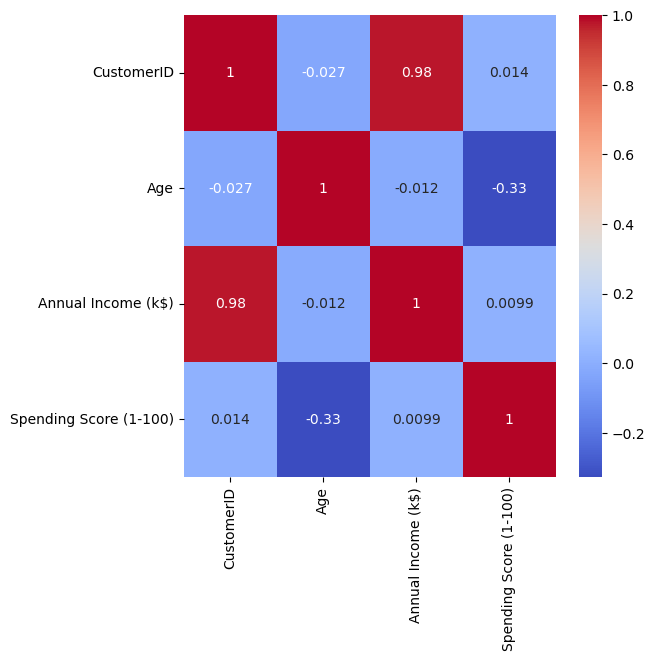

In [10]:
corr= df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr,annot=True,cmap='coolwarm')

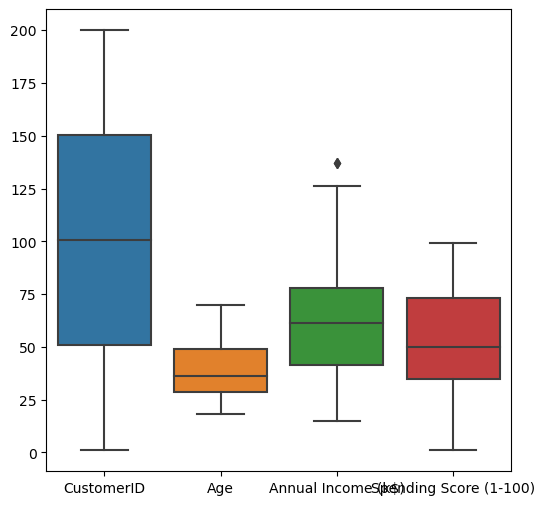

In [11]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df)
plt.show()

In [12]:
def out_liers(df , column):
    if pd.api.types.is_numeric_dtype(df[column]):
        Q1  , Q3 = np.percentile(df[column] , [25,75])
        IQR = Q3 - Q1
        l_bound = Q1 - (1.5 * IQR) ## Lower Bound
        u_bound = Q3 + (1.5 * IQR) ## Upper Bound
        df = df[(df[column]>=l_bound) & (df[column] <=u_bound)]

    return df

In [13]:
for col in df.columns:
    df = out_liers(df, col)
    print(f'--------------------------------------------------------')
    print(f'Dataset Shape After Removing Outliers From ({col}): {df.shape}\n')

--------------------------------------------------------
Dataset Shape After Removing Outliers From (CustomerID): (200, 5)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (Gender): (200, 5)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (Age): (200, 5)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (Annual Income (k$)): (198, 5)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (Spending Score (1-100)): (198, 5)



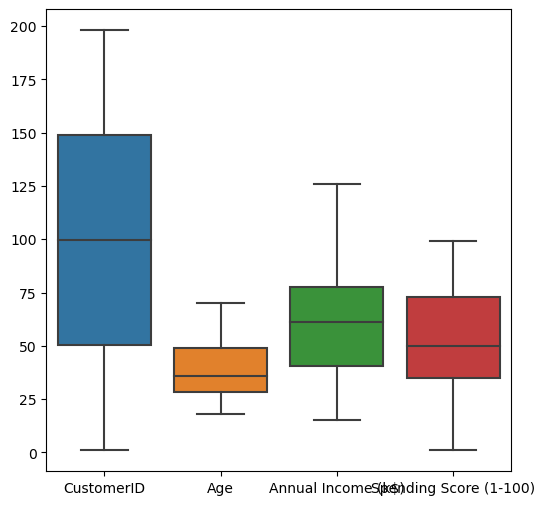

In [14]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df)
plt.show()

<Axes: ylabel='Spending Score (1-100)'>

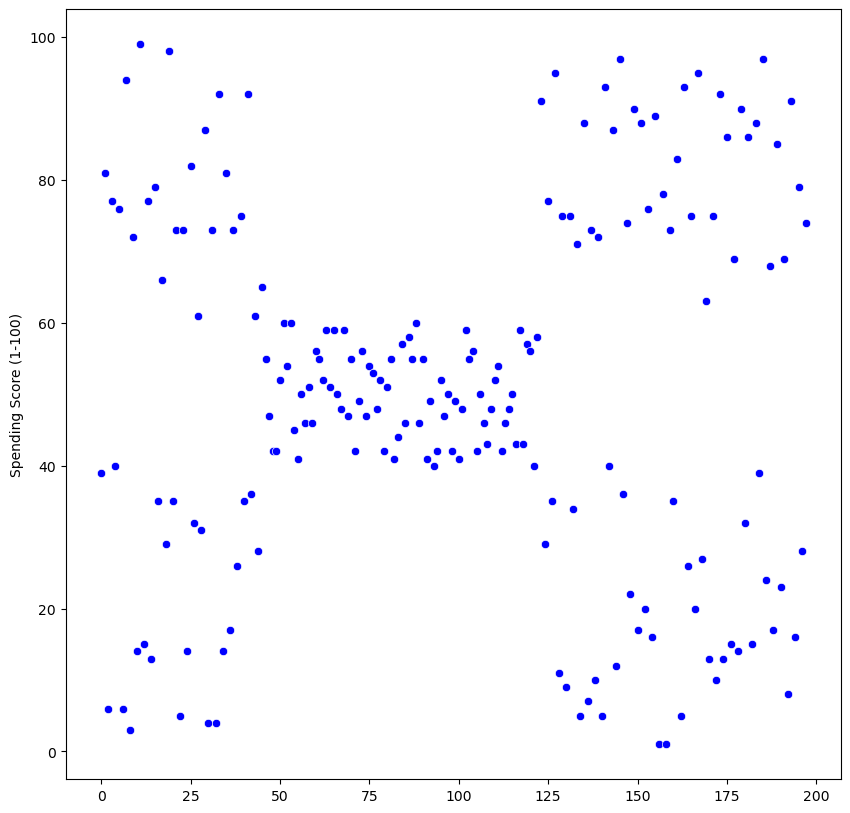

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df['Spending Score (1-100)'],c='b')

In [16]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
193,113,91
194,120,16
195,120,79
196,126,28


## Elbow Method For Number Of Clusters 

In [17]:
elb =[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    elb.append(kmeans.inertia_)

c:\Users\Zaghloula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Zaghloula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Zaghloula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Zaghloula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

Text(0.5, 1.0, 'Elbow Method')

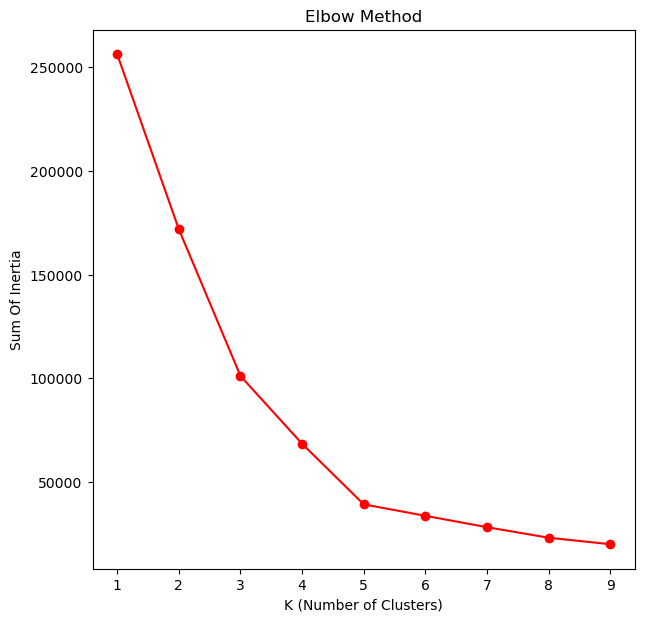

In [18]:
plt.figure(figsize=(7, 7))
plt.plot(range(1, 10), elb, marker='o', c='r')
plt.xlabel('K (Number of Clusters)')
plt.ylabel('Sum Of Inertia')
plt.title('Elbow Method')

## Our Model

In [19]:
kmeans= KMeans(n_clusters=5)
y_pred=kmeans.fit_predict(X)
y_pred

c:\Users\Zaghloula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Zaghloula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3])

In [20]:
y_pred is kmeans.labels_

True

In [21]:
X= df.iloc[:, [3,4]].values


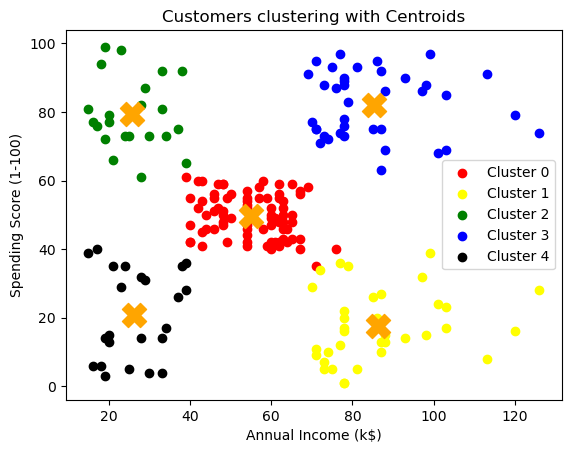

In [22]:

plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], color='red', label='Cluster 0')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], color='yellow', label='Cluster 1')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], color='green', label='Cluster 2')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], color='blue', label='Cluster 3')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], color='black', label='Cluster 4')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='orange', marker='X')

# Plot labels and title
plt.title('Customers clustering with Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Add Label For My Dataset

In [23]:
df['Clusters'] = y_pred

In [24]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
193,194,Female,38,113,91,3
194,195,Female,47,120,16,1
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1


## Make Classification on My New Dataset Using Supervised Learning 

In [25]:
X=df.iloc[:,1:5]
y=df.iloc[:,-1]
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  198 non-null    object
 1   Age                     198 non-null    int64 
 2   Annual Income (k$)      198 non-null    int64 
 3   Spending Score (1-100)  198 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.7+ KB


In [27]:
y.head()

0    4
1    2
2    4
3    2
4    4
Name: Clusters, dtype: int32

In [29]:
LE=LabelEncoder()
X['Gender'] = LE.fit_transform(X['Gender'])

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  198 non-null    int32
 1   Age                     198 non-null    int64
 2   Annual Income (k$)      198 non-null    int64
 3   Spending Score (1-100)  198 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 7.0 KB


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
SC=StandardScaler()
X_train=SC.fit_transform(X_train)
X_test=SC.transform(X_test)

In [35]:
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_
best_rf_params = rf_grid.best_params_

In [37]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return acc, conf_matrix, report

In [38]:
print("Best Random Forest Parameters:", best_rf_params)

Best Random Forest Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [39]:
best_rf_acc, _, _ = evaluate_model(best_rf_model, X_test, y_test)

In [40]:
print("\nImproved Random Forest Accuracy:", best_rf_acc)


Improved Random Forest Accuracy: 0.975
